## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)

In [1]:
import pandas as pd
import csv
from plotnine import *

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%ls data/seoul_bike/

서울_공공자전거_따릉이_이용현황자료_20161026.xlsx
서울특별시 공공자전거 대여이력 정보_2015년.csv
서울특별시 공공자전거 대여이력 정보_2016년_1.csv
서울특별시 공공자전거 대여이력 정보_2016년_2.csv
서울특별시 공공자전거 대여이력 정보_2016년_3.csv
서울특별시 공공자전거 대여이력 정보_2017년_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_3.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv


In [3]:
df = pd.read_csv('data/seoul_bike/서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv', encoding='euc-kr')
df.shape

(784734, 11)

In [4]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-02041','2018-01-01 00:00:10','227',' 양평2나들목 보행통로 입구',9,'2018-01-01 00:04:03','227',' 양평2나들목 보행통로 입구',9,3,50
1,'SPB-03796','2018-01-01 00:00:42','2219',"' 고속터미널역 8-1번, 8-2번 출구 사이'",15,'2018-01-01 00:25:41','3511',' 응봉역 1번출구',9,24,7670
2,'SPB-02402','2018-01-01 00:00:58','567',' 성수역 2번출구 앞',13,'2018-01-01 00:09:33','3506',' 영동대교 북단',2,8,1390
3,'SPB-01564','2018-01-01 00:01:02','568',' 청계8가사거리 부근',5,'2018-01-01 00:10:13','521',' 왕십리역 11번 출구 앞',9,8,1820
4,'SPB-05713','2018-01-01 00:01:03','361',' 동묘앞역 1번출구 뒤',4,'2018-01-01 00:06:18','383',' 신당역 12번 출구 뒤',8,4,850


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784734 entries, 0 to 784733
Data columns (total 11 columns):
'자전거번호'      784734 non-null object
'대여일시'       784734 non-null object
'대여대여소번호'    784734 non-null object
'대여대여소명'     784734 non-null object
'대여거치대'      784734 non-null int64
'반납일시'       784734 non-null object
'반납대여소번호'    784734 non-null object
'반납대여소명'     784734 non-null object
'반납거치대'      784734 non-null int64
'이용시간(분)'    784734 non-null int64
'이용거리(M)'    784734 non-null int64
dtypes: int64(4), object(7)
memory usage: 65.9+ MB


In [6]:
df.columns = df.columns.str.strip("'")

In [7]:
df['반납일시'].dtypes

dtype('O')

In [8]:
# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

In [9]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,50
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,7670
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,1390
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,1820
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,850


In [10]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
784729,SPB-00326,2018-03-31 23:59:46,2034,사당역 7번출구쪽,4,2018-04-01 00:26:50,2136,신림역 8번출구,7,26,5010
784730,SPB-07675,2018-03-31 23:59:52,266,영등포청과시장 사거리,10,2018-04-01 00:07:30,245,삼성생명 당산사옥 앞,10,7,950
784731,SPB-10926,2018-03-31 23:59:54,926,불광역 8번출구,2,2018-04-01 00:40:21,926,불광역 8번출구,6,39,3130
784732,SPB-15970,2018-03-31 23:59:56,503,더샵스타시티 C동 앞,15,2018-04-01 00:04:38,504,신자초교입구교차로,1,4,590
784733,SPB-04887,2018-03-31 23:59:58,1026,대명초교 입구 교차로,4,2018-04-01 01:45:18,1017,맥도날드(길동),11,104,16830


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784734 entries, 0 to 784733
Data columns (total 11 columns):
자전거번호      784734 non-null object
대여일시       784734 non-null object
대여대여소번호    784734 non-null object
대여대여소명     784734 non-null object
대여거치대      784734 non-null int64
반납일시       784734 non-null object
반납대여소번호    784734 non-null object
반납대여소명     784734 non-null object
반납거치대      784734 non-null int64
이용시간(분)    784734 non-null int64
이용거리(M)    784734 non-null int64
dtypes: int64(4), object(7)
memory usage: 65.9+ MB


In [12]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [13]:
df['대여대여소번호'].value_counts()

207         6219
113         5127
502         4386
1210        3762
358         3201
540         2910
1308        2806
2102        2775
259         2644
415         2640
2219        2610
152         2564
421         2536
500         2503
311         2471
183         2425
567         2406
409         2402
1906        2390
501         2338
114         2313
419         2310
907         2298
106         2298
316         2266
210         2254
302         2241
222         2222
107         2180
703         2129
            ... 
1967          40
1663          38
1850          37
741           37
2303          36
1666          34
1652          33
2282          33
952           32
1723          31
1974          29
1669          29
1677          25
277           24
937           24
2289          22
1968          22
2164          20
1846          18
1984          16
1450          16
607           13
1664           9
1847           6
1727           6
상암센터 정비실       6
1671           5
위트콤           

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [14]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [15]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [16]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [17]:
df_rent = df['대여요일'].value_counts().reset_index()
df_rent.columns = ['datetime', 'count']
df_rent = df_rent.sort_values('datetime')
df_rent.head()

,datetime,count
4,0,106462
2,1,120910
3,2,116677
5,3,104303
0,4,128287


In [18]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

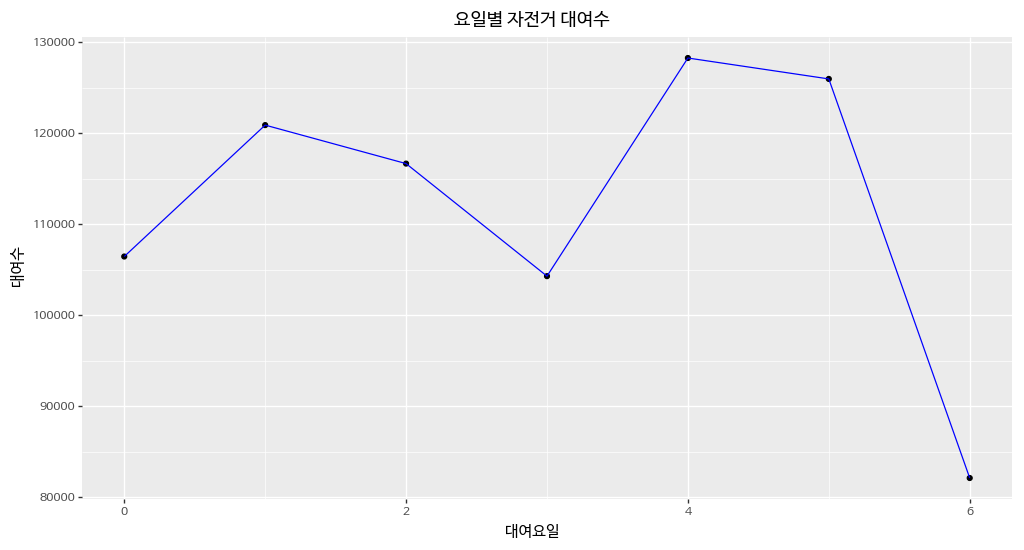

<ggplot: (303184178)>

In [20]:
(ggplot(df_rent)
 + aes(x='datetime', y='count')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)